# Unit 4 Homework Assignment: A Whale Off the Port(folio)

An analytical notebook that computes and visualizes major metrics of multiple portfolios and determines which portfolio outperformed others

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Instantiate file paths
whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")
risk_free_returns_path = Path("Resources/risk_free_rate.csv")

# Read files into pandas DataFrame
whale_returns_df = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True).sort_index()
algo_returns_df = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True).sort_index()
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True).sort_index()
risk_free_returns_df = pd.read_csv(risk_free_returns_path, parse_dates=True, infer_datetime_format=True).sort_index()

# Set date format
whale_returns_df["Date"] = pd.to_datetime(whale_returns_df["Date"]).dt.strftime('%Y-%m-%d')
algo_returns_df["Date"] = pd.to_datetime(algo_returns_df["Date"]).dt.strftime('%Y-%m-%d')
sp500_history_df["Date"] = pd.to_datetime(sp500_history_df["Date"]).dt.strftime('%Y-%m-%d')
risk_free_returns_df["Date"] = pd.to_datetime(risk_free_returns_df["Date"]).dt.strftime('%Y-%m-%d')

# Set 'Date' column as index and sort by date (index)
whale_returns_df = whale_returns_df.set_index('Date').sort_index()
algo_returns_df = algo_returns_df.set_index('Date').sort_index()
sp500_history_df = sp500_history_df.set_index('Date').sort_index()
risk_free_returns_df = risk_free_returns_df.set_index('Date').sort_index()

In [4]:
# Clean nulls in whale_returns_df
whale_returns_df.isnull().mean() * 100 # Check for nulls
whale_returns_df = whale_returns_df.dropna() # Drop nulls
whale_returns_df = whale_returns_df.drop_duplicates() # Drop duplicates
whale_returns_df.isnull().sum() # Validate no more missing values

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Clean nulls in whale_returns_df
algo_returns_df.isnull().mean() * 100 # Check for nulls
algo_returns_df = algo_returns_df.dropna() # Drop nulls
algo_returns_df = algo_returns_df.drop_duplicates() # Drop duplicates
algo_returns_df.isnull().sum() # Validate no more missing values

Algo 1    0
Algo 2    0
dtype: int64

In [6]:
# Clean nulls in whale_returns_df
sp500_history_df.isnull().mean() * 100 # Check for nulls
sp500_history_df = sp500_history_df.dropna() # Drop nulls
sp500_history_df = sp500_history_df.drop_duplicates() # Drop duplicates
sp500_history_df.isnull().sum() # Validate no more missing values

Close    0
dtype: int64

In [7]:
# Clean nulls in risk_free_returns
risk_free_returns_df.isnull().mean() * 100 # Check for nulls
risk_free_returns_df = risk_free_returns_df.dropna() # Drop nulls
risk_free_returns_df.isnull().sum() # Validate no more missing values
risk_free_returns_df

,rf_rate
Date,
1954-01-04,0.000148
1954-01-05,0.000142
1954-01-06,0.000142
1954-01-07,0.000146
1954-01-08,0.000146
...,...
2020-11-27,0.000010
2020-11-30,0.000009
2020-12-01,0.000010


In [8]:
# Clean up data format by removing unwanted characters
charaters_to_remove = ['$', ',']

for char in charaters_to_remove:

    try:
        for col in whale_returns_df:
            whale_returns_df[col] = whale_returns_df[col].str.replace(char,'').astype(float)
    except: 
        pass


    try:
        for col in algo_returns_df:
            algo_returns_df[col] = algo_returns_df[col].str.replace(char,'').astype(float)
    except: 
        pass


    try:
        for col in sp500_history_df:
            sp500_history_df[col] = sp500_history_df[col].str.replace(char,'').astype(float)
    except: 
        pass

C:\Users\illya\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [9]:
# Calculate daily return for sp500_history_df
sp500_history_df['S&P 500'] = sp500_history_df['Close'].pct_change().dropna()

In [10]:
# Concatenate all DateFrames into one master DataFrame
all_data_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df['S&P 500']], axis="columns", join="inner")
all_data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

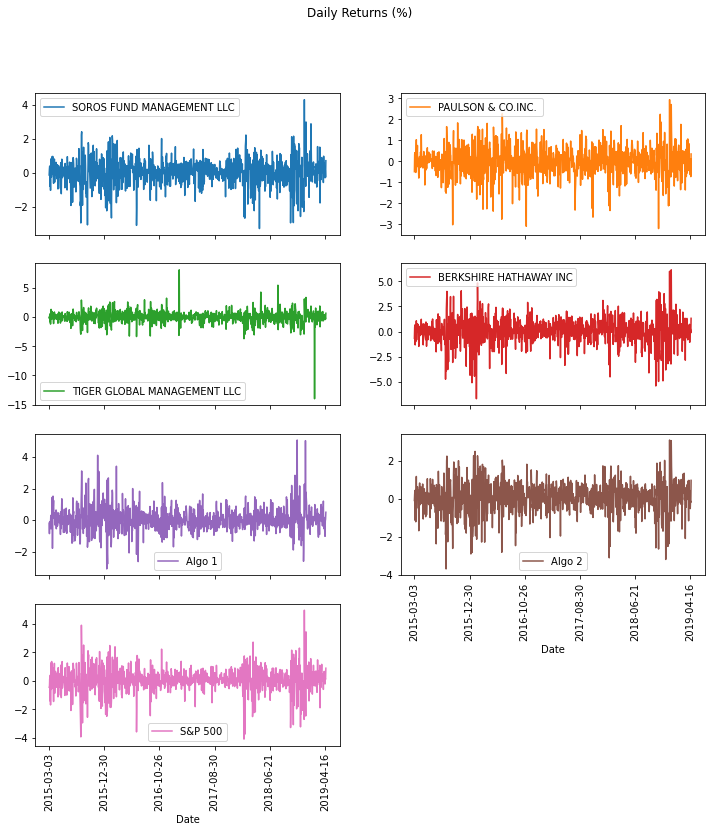

In [11]:
# Plot daily returns of all portfolios
all_daily_returns = all_data_df * 100
all_daily_returns.plot(subplots=True, layout=(4,2), figsize=(12,12), rot=90, title="Daily Returns (%)")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns (%)'}, xlabel='Date'>

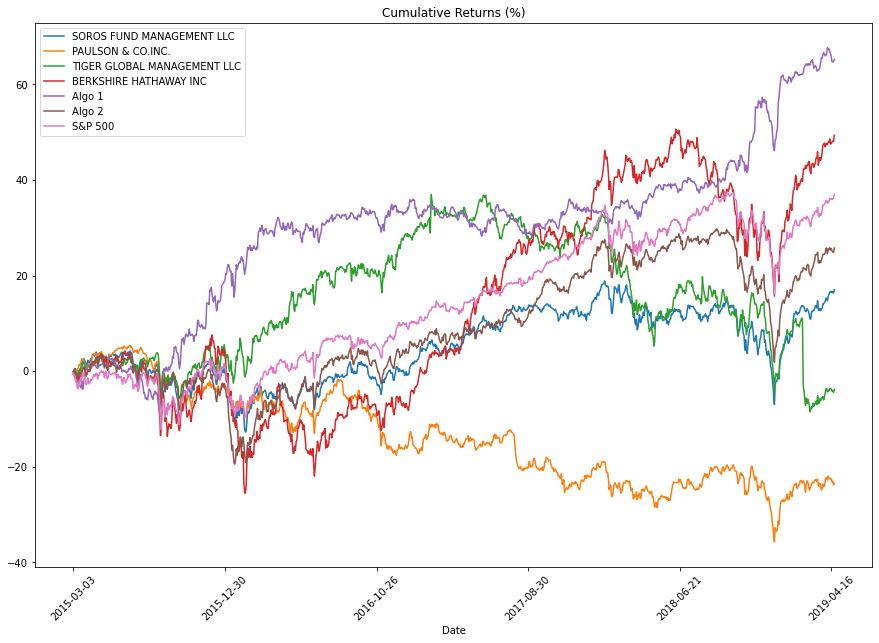

In [12]:
# Calculate cumulative returns of all portfolios
cumulative_returns = all_data_df.cumsum() * 100

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), rot=45, title="Cumulative Returns (%)")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


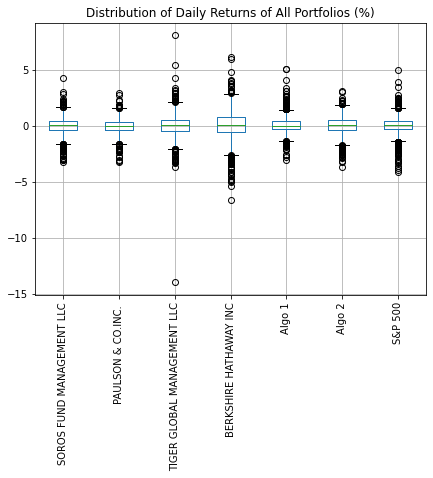

In [13]:
# Box plot to visually show risk
daily_return_distribution = all_daily_returns
daily_return_distribution.boxplot(figsize=(7,5), rot=90)
plt.title("Distribution of Daily Returns of All Portfolios (%)")
plt.suptitle('')
plt.show()

### Calculate Standard Deviations

<AxesSubplot:title={'center':'Standatd Deviation of Daily Returns (%)'}>

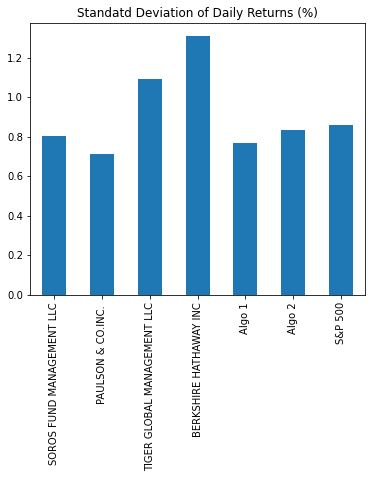

In [14]:
# Calculate the daily standard deviations of all portfolios
daily_return_stdev = all_daily_returns.std()
daily_return_stdev.plot.bar(figsize=(6,5), rot=90, title="Standatd Deviation of Daily Returns (%)")

### Determine which portfolios are riskier than the S&P 500

In [15]:
# Calculate the daily standard deviation of S&P 500
sp500_stdev = sp500_history_df['S&P 500'].std() * 100

# Determine which portfolios are riskier than the S&P 500
for portfolio, stdev in daily_return_stdev.iteritems():
    if stdev > sp500_stdev:
        print(f"{portfolio} is riskier than S&P 500 \n {portfolio} Stdev = {round(stdev,2)}; \n S&P500 Stdev = {round(sp500_stdev,2)} \n")


TIGER GLOBAL MANAGEMENT LLC is riskier than S&P 500 
 TIGER GLOBAL MANAGEMENT LLC Stdev = 1.09; 
 S&P500 Stdev = 0.81 

BERKSHIRE HATHAWAY INC is riskier than S&P 500 
 BERKSHIRE HATHAWAY INC Stdev = 1.31; 
 S&P500 Stdev = 0.81 

Algo 2 is riskier than S&P 500 
 Algo 2 Stdev = 0.83; 
 S&P500 Stdev = 0.81 

S&P 500 is riskier than S&P 500 
 S&P 500 Stdev = 0.86; 
 S&P500 Stdev = 0.81 



### Calculate the Annualized Standard Deviation

In [16]:
# Calculate the annualized standard deviation (252 trading days)
annualized_returns_stdev = daily_return_stdev * np.sqrt(252)
print(annualized_returns_stdev)

SOROS FUND MANAGEMENT LLC      12.730604
PAULSON & CO.INC.              11.311879
TIGER GLOBAL MANAGEMENT LLC    17.301477
BERKSHIRE HATHAWAY INC         20.790152
Algo 1                         12.179306
Algo 2                         13.222279
S&P 500                        13.666631
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day Rolling Standard Deviation'}, xlabel='Date'>

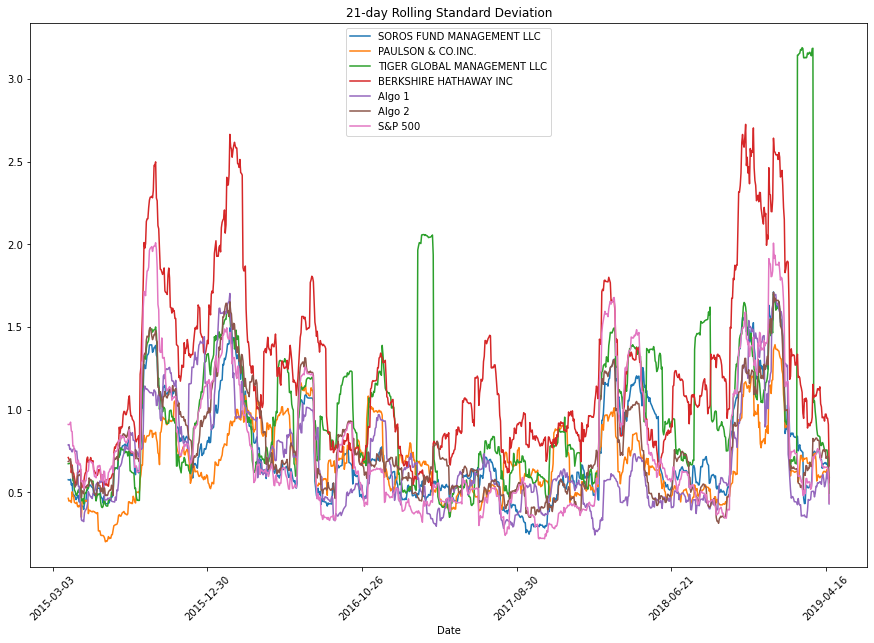

In [17]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_stdev = all_daily_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling_stdev.plot(figsize=(15,10), rot=45, 
                   title = '21-day Rolling Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

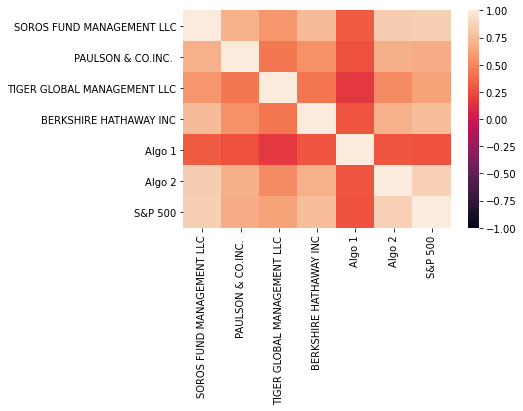

In [18]:
# Calculate the correlation
all_portfolio_corr = all_daily_returns.corr()

# Display de correlation matrix
sns.heatmap(all_portfolio_corr, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

0.008547482423256337
0.7411777878693683
0.011532297059019286


Text(0.5, 1.0, 'Beta: Birtkshire Hathaway Inc. vs. S&P 500')

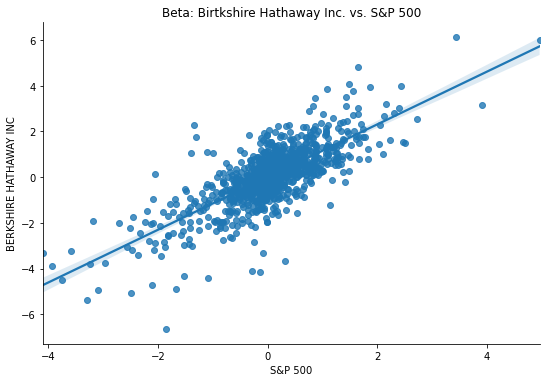

In [19]:
# Calculate covariance of a single portfolio
covariance_brk = all_daily_returns['BERKSHIRE HATHAWAY INC'].cov(all_data_df['S&P 500'])
print(covariance_brk)

# Calculate variance of S&P 500
sp500_var = all_daily_returns['S&P 500'].var()
print(sp500_var)

# Computing beta
brk_beta = covariance_brk / sp500_var
print(brk_beta)

# Plot beta trend
sns.lmplot(x = 'S&P 500', y = 'BERKSHIRE HATHAWAY INC', data = all_daily_returns, aspect = 1.5, fit_reg = True)
ax = plt.gca()
ax.set_title('Beta: Birtkshire Hathaway Inc. vs. S&P 500' )

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21-day Exponentially Weighted Average'}, xlabel='Date'>

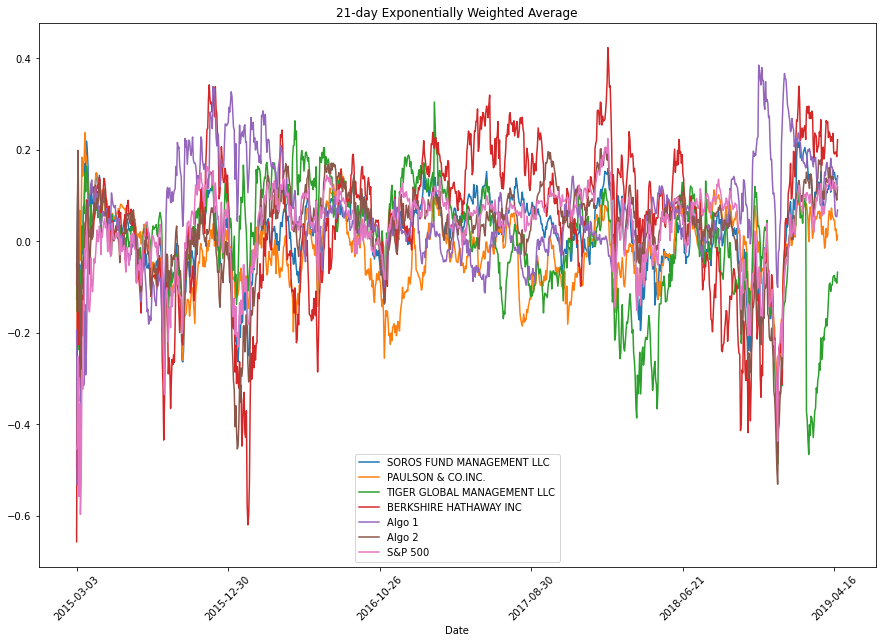

In [20]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = all_daily_returns.ewm(halflife = 21)
portfolio_ewm.mean().plot(figsize=(15,10), rot=45, 
                   title = '21-day Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [21]:
# Annualized Sharpe Ratios

sharpe_ratio_all_daily_returns = pd.concat([all_daily_returns, risk_free_returns_df], axis = 'columns', join = 'inner')

sharpe_ratio = ((sharpe_ratio_all_daily_returns.mean() - sharpe_ratio_all_daily_returns['rf_rate'].mean()) * 252) / (sharpe_ratio_all_daily_returns.std() * np.sqrt(252))

sharpe_ratio = sharpe_ratio.drop(['rf_rate'])

<AxesSubplot:title={'center':'Portfolio Sharpe Ratio'}>

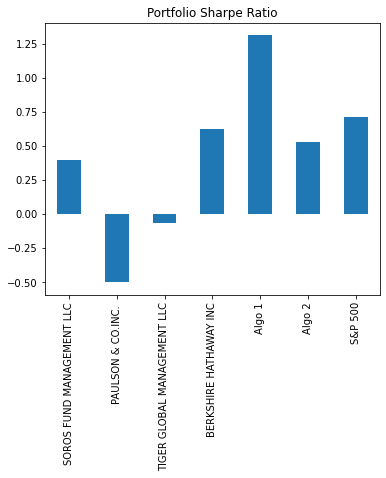

In [22]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(6,5), rot=90, title="Portfolio Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategy 1 (Algo 1) outperforms S&P500 and all other portfolios, while Algorithmic strategy 2 (Algo 2) has a median performance, outperforming only Soros, Paulson, and Tiger, while underperforming S&P500, Algo 1, and Berkshire.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.


* `AMD` - [Advanced Micro Devices, Inc.](https://en.wikipedia.org/wiki/Advanced_Micro_Devices)

* `NVDA` - [Nvidia Corporation](https://en.wikipedia.org/wiki/Nvidia)

* `INTC` - [Intel Corporation](https://en.wikipedia.org/wiki/Intel)

In [23]:
# Reading data from AMD stock
amd_path = Path("Resources/AMD.csv") # declare path
amd_df = pd.read_csv(amd_path, parse_dates = True, infer_datetime_format = True) # read csv
amd_df["Date"] = pd.to_datetime(amd_df["Date"]).dt.strftime('%Y-%m-%d') # set date format and column
amd_df = amd_df.set_index("Date").sort_index() # set date index
amd_df = amd_df.dropna() # drop nulls
amd_df = amd_df.drop_duplicates() # drop duplicates
print(amd_df.isnull().sum()) # validate no more missing values
amd_df.head()

Symbol    0
Close     0
dtype: int64


,Symbol,Close
Date,,
1980-03-17,AMD,3.145833
1980-03-18,AMD,3.031250
1980-03-19,AMD,3.041667
1980-03-20,AMD,3.010417
1980-03-21,AMD,2.916667


In [24]:
# Reading data from NVDA stock
nvda_path = Path("Resources/NVDA.csv") # declare path 
nvda_df = pd.read_csv(nvda_path, parse_dates = True, infer_datetime_format = True) # read csv
nvda_df["Date"] = pd.to_datetime(nvda_df["Date"]).dt.strftime('%Y-%m-%d') # set date format and column
nvda_df = nvda_df.set_index("Date").sort_index() # set date index
nvda_df = nvda_df.dropna() # drop nulls
nvda_df = nvda_df.drop_duplicates() # drops duplicates
print(nvda_df.isnull().sum()) #validate no more missing values
nvda_df.head()

Symbol    0
Close     0
dtype: int64


,Symbol,Close
Date,,
1999-01-22,NVDA,1.640625
1999-01-25,NVDA,1.812500
1999-01-26,NVDA,1.671875
1999-01-27,NVDA,1.666667
1999-01-28,NVDA,1.661458


In [25]:
# Reading data from INTC stock
intc_path = Path("Resources/INTC.csv") # declare path
intc_df = pd.read_csv(intc_path, parse_dates = True, infer_datetime_format = True) # read csv
intc_df["Date"] = pd.to_datetime(intc_df["Date"]).dt.strftime('%Y-%m-%d') # set date format and column
intc_df = intc_df.set_index("Date").sort_index() # set date index
intc_df = intc_df.dropna() # drop nulls
intc_df = intc_df.drop_duplicates() # drop duplicates
print(intc_df.isnull().sum()) # validate no more missing values
intc_df.head()

Symbol    0
Close     0
dtype: int64


,Symbol,Close
Date,,
1980-03-17,INTC,0.325521
1980-03-18,INTC,0.322917
1980-03-19,INTC,0.330729
1980-03-20,INTC,0.329427
1980-03-21,INTC,0.317708


In [29]:
# Combine all stocks in a single DataFrame
custom_portfolio_df = pd.concat([amd_df, nvda_df, intc_df], axis = "rows", join = "inner")
custom_portfolio_df.head()

,Symbol,Close
Date,,
1980-03-17,AMD,3.145833
1980-03-18,AMD,3.031250
1980-03-19,AMD,3.041667
1980-03-20,AMD,3.010417
1980-03-21,AMD,2.916667


In [30]:
# Reset Date index
custom_portfolio_df = custom_portfolio_df.reset_index()
custom_portfolio_df.head()

,Date,Symbol,Close
0,1980-03-17,AMD,3.145833
1,1980-03-18,AMD,3.031250
2,1980-03-19,AMD,3.041667
3,1980-03-20,AMD,3.010417
4,1980-03-21,AMD,2.916667


In [31]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio_df = custom_portfolio_df.pivot_table(values="Close", index="Date", columns="Symbol")
custom_portfolio_df.head()

Symbol,AMD,INTC,NVDA
Date,,,
1980-03-17,3.145833,0.325521,NaN
1980-03-18,3.031250,0.322917,NaN
1980-03-19,3.041667,0.330729,NaN
1980-03-20,3.010417,0.329427,NaN
1980-03-21,2.916667,0.317708,NaN


In [32]:
# Calculate daily returns
daily_custom_portfolio_df = custom_portfolio_df.pct_change()

# Drop NAs
daily_custom_portfolio_df = daily_custom_portfolio_df.dropna()

# Display sample data
daily_custom_portfolio_df.tail()

Symbol,AMD,INTC,NVDA
Date,,,
2021-04-12,-0.050507,-0.041752,0.056181
2021-04-13,0.020489,-0.002905,0.030936
2021-04-14,-0.020451,-0.015793,-0.025670
2021-04-15,0.056779,0.012930,0.056310
2021-04-16,-0.010360,-0.004153,-0.013927


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_returns = daily_custom_portfolio_df.dot(weights) * 100

# Display sample data
weighted_portfolio_returns.head()

Date
1999-01-25   -5.717137
1999-01-26   -0.975362
1999-01-27   -1.123157
1999-01-28    1.010070
1999-01-29   -0.656237
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_df = pd.concat([all_daily_returns, weighted_portfolio_returns], axis = 'columns', join = 'inner')

all_portfolios_df.columns.values[7] = 'Custom' # rename the Custom portfolio column
all_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-05,0.401600,0.407605,0.235466,0.672633,-0.095505,0.432316,0.119608,-0.585623
2015-03-06,-0.790536,-0.357403,-0.848117,-1.309806,-0.495674,-1.146032,-1.417393,-3.011423
2015-03-09,0.058228,0.422541,0.584274,-0.165246,-0.544705,0.130322,0.394446,-0.883966
2015-03-10,-1.026297,-0.534072,-1.207915,-0.973903,-0.139159,-1.215536,-1.696138,0.204140
2015-03-11,0.401192,0.516314,0.331183,-0.114668,0.299387,0.060476,-0.191766,-0.571224


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_df.dropna()
all_portfolios_df.isnull().sum()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
annualized_stdev = all_portfolios_df.std() * np.sqrt(252)
annualized_stdev

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
rolling_stdev = all_portfolios_df.rolling(window = 21).std()

# Plot rolling standard deviation
rolling_stdev.plot(figsize=(12, 8), rot=90, 
                   title = '21-day Rolling Standard Deviation')

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
correlation = all_portfolios_df.corr()
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
rolling_covariance_custom = all_portfolios_df['Custom'].rolling(window = 60).cov(all_portfolios_df['S&P 500']) # calculate covariance of Custom portfolio vs. SP500
rolling_variance_sp500 = all_portfolios_df['S&P 500'].rolling(window = 60).var() # calculate variance of SP500
rolling_beta = rolling_covariance_custom / rolling_variance_sp500 # calculate beta
rolling_beta.plot(figsize = (12, 8), title =  '60-day Rolling Custom Portfolio Beta vs. S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
sharpe_ratio_all_portfolios = pd.concat([all_portfolios_df, risk_free_returns_df], axis = 'columns', join = 'outer') # concat risk free rate to all portfolio returns df
sharpe_ratio = ((sharpe_ratio_all_portfolios.mean() - sharpe_ratio_all_portfolios['rf_rate'].mean()) * 252) / (sharpe_ratio_all_portfolios.std() * np.sqrt(252)) # calculate annualized sharpe ratio
sharpe_ratio = sharpe_ratio.drop(['rf_rate']) # drop risk free rate from all portfolio returns df

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(6,5), rot=90, title="All Portfolios Sharpe Ratio")

### How does your portfolio do?

Write your answer here!